## PROJECT ON "TIME SERIES FORCASTING FOR ENERGY CONSUMPTION : OPTIMIZING RESOURCE ALLOCATION IN SMART GRID SYSTEMS"
                                           
                                           SUBMITTED BY,
                                           
                                                           DEEPA.P
                                                           ENTRY ELEVATE DSML_FEB_B4 2023 BATCH
                                                           GITHUB ID : deepa-pallinambi
                                           

INTRODUCTION

  This project aims to develop a time series forecasting model for predicting energy consumption
 patterns in smart grid systems. By leveraging historical data on energy usage, weather
 conditions, holidays, and other relevant factors, the model seeks to forecast future energy
 consumption accurately. The goal is to optimize energy distribution and resource allocation,
 enabling efficient management of electricity grids. By forecasting energy consumption patterns,
 this project contributes to reducing costs, improving grid reliability, and promoting sustainability in energy management



OBJECTIVES:
1. development of an accurate time series forcasting model for energy consumption.
2. optimization of energy distribution and resource allocation in smart grid systems.
3. reduction in operational costs and improve grid reliability.
4. enhance sustainability through efficient energy management practices.

## DATA COLLECTION AND PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\final solution\AppData\Local\Temp\ipykernel_5448\3064458193.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("energy_consumption_dataset.csv")
df

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0      2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1      2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2      2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3      2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4      2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                    ...          ...        ...         ...         ...   
43820  2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821  2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822  2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823  2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824  2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  
0        0.059692        169.032542         1469.402213         1367.517344  
1       19.246831        705.612502          169.805891         4078.500517  
2       10.978002        268.142230         1988.009121         4614.282050  
3        2.472984        262.186871          174.970181         3578.730578  
4        4.509169        486.224719         1004.081112         4194.210499  
...           ...               ...                 ...                 ...  
43820    3.685611        666.593466         1538.228889         1087.122191  
43821    6.561095        772.779958         1641.830840         4277.546615  
43822    7.276048        567.131701         1800.057131         2915.121073  
43823    7.211708         27.142705          926.475955         2944.563179  
43824    2.971656        373.238730          370.274341         1473.671093  

[43825 rows x 15 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date/Time                           43825 non-null  object 
 1   Temperature                         43825 non-null  float64
 2   Humidity                            43825 non-null  float64
 3   Day of Week                         43825 non-null  object 
 4   Time of Day                         43825 non-null  object 
 5   Season                              43825 non-null  object 
 6   Holiday Indicator                   43825 non-null  int64  
 7   Previous Day's Energy Consumption   43825 non-null  float64
 8   Previous Week's Energy Consumption  43825 non-null  float64
 9   Energy Price                        43825 non-null  float64
 10  Daylight Hours                      43825 non-null  float64
 11  Wind Speed                          43825

In [4]:
df.isnull().sum()

Date/Time                             0
Temperature                           0
Humidity                              0
Day of Week                           0
Time of Day                           0
Season                                0
Holiday Indicator                     0
Previous Day's Energy Consumption     0
Previous Week's Energy Consumption    0
Energy Price                          0
Daylight Hours                        0
Wind Speed                            0
Solar Irradiance                      0
Population Density                    0
Energy Consumption                    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(43825, 15)

In [7]:
df.columns

Index(['Date/Time', 'Temperature', 'Humidity', 'Day of Week', 'Time of Day',
       'Season', 'Holiday Indicator', 'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption'],
      dtype='object')

In [8]:
df.describe()

Temperature      Humidity  Holiday Indicator  \
count  43825.000000  43825.000000       43825.000000   
mean      14.890011     55.001300           0.050633   
std       14.476096     20.201569           0.219250   
min       -9.996378     20.000232           0.000000   
25%        2.318324     37.402173           0.000000   
50%       14.886739     54.965030           0.000000   
75%       27.454544     72.478944           0.000000   
max       39.998898     89.997775           1.000000   

       Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
count                       43825.000000                        43825.000000   
mean                         3004.992815                         3007.367131   
std                          1150.099329                         1158.462428   
min                          1000.251530                         1000.054170   
25%                          2013.068826                         1995.962354   
50%                          3013.983220                         3012.369499   
75%                          4004.036776                         4014.428878   
max                          4999.898186                         4999.996048   

       Energy Price  Daylight Hours    Wind Speed  Solar Irradiance  \
count  43825.000000    43825.000000  43825.000000      43825.000000   
mean       0.174295       11.979391      9.968398        498.817391   
std        0.072037        2.310568      5.787710        288.424913   
min        0.050005        8.000024      0.000416          0.035109   
25%        0.111768        9.968250      4.956682        248.935625   
50%        0.174438       11.971855      9.933075        499.333064   
75%        0.236505       13.978746     14.962423        748.138519   
max        0.299999       15.999874     19.999240        999.927153   

       Population Density  Energy Consumption  
count        43825.000000        43825.000000  
mean          1023.628163         3008.245695  
std            562.421323         1153.422006  
min             50.011787         1000.033142  
25%            537.001881         2012.751540  
50%           1021.824580         3017.398352  
75%           1511.251895         4008.610275  
max           1999.989309         4999.915113

In [9]:
df.describe(include="all")

Date/Time   Temperature      Humidity Day of Week  \
count                 43825  43825.000000  43825.000000       43825   
unique                43825           NaN           NaN           7   
top     2020-01-01 00:00:00           NaN           NaN   Wednesday   
freq                      1           NaN           NaN        6264   
mean                    NaN     14.890011     55.001300         NaN   
std                     NaN     14.476096     20.201569         NaN   
min                     NaN     -9.996378     20.000232         NaN   
25%                     NaN      2.318324     37.402173         NaN   
50%                     NaN     14.886739     54.965030         NaN   
75%                     NaN     27.454544     72.478944         NaN   
max                     NaN     39.998898     89.997775         NaN   

       Time of Day  Season  Holiday Indicator  \
count        43825   43825       43825.000000   
unique          24       4                NaN   
top          00:00  Spring                NaN   
freq          1827   11147                NaN   
mean           NaN     NaN           0.050633   
std            NaN     NaN           0.219250   
min            NaN     NaN           0.000000   
25%            NaN     NaN           0.000000   
50%            NaN     NaN           0.000000   
75%            NaN     NaN           0.000000   
max            NaN     NaN           1.000000   

        Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
count                        43825.000000                        43825.000000   
unique                                NaN                                 NaN   
top                                   NaN                                 NaN   
freq                                  NaN                                 NaN   
mean                          3004.992815                         3007.367131   
std                           1150.099329                         1158.462428   
min                           1000.251530                         1000.054170   
25%                           2013.068826                         1995.962354   
50%                           3013.983220                         3012.369499   
75%                           4004.036776                         4014.428878   
max                           4999.898186                         4999.996048   

        Energy Price  Daylight Hours    Wind Speed  Solar Irradiance  \
count   43825.000000    43825.000000  43825.000000      43825.000000   
unique           NaN             NaN           NaN               NaN   
top              NaN             NaN           NaN               NaN   
freq             NaN             NaN           NaN               NaN   
mean        0.174295       11.979391      9.968398        498.817391   
std         0.072037        2.310568      5.787710        288.424913   
min         0.050005        8.000024      0.000416          0.035109   
25%         0.111768        9.968250      4.956682        248.935625   
50%         0.174438       11.971855      9.933075        499.333064   
75%         0.236505       13.978746     14.962423        748.138519   
max         0.299999       15.999874     19.999240        999.927153   

        Population Density  Energy Consumption  
count         43825.000000        43825.000000  
unique                 NaN                 NaN  
top                    NaN                 NaN  
freq                   NaN                 NaN  
mean           1023.628163         3008.245695  
std             562.421323         1153.422006  
min              50.011787         1000.033142  
25%             537.001881         2012.751540  
50%            1021.824580         3017.398352  
75%            1511.251895         4008.610275  
max            1999.989309         4999.915113

outlier detection and treatement:

In [10]:
 q1 = np.percentile(df["Temperature"], 25, interpolation = 'midpoint')
 
q3 = np.percentile(df["Temperature"], 75, interpolation = 'midpoint') 

iqr = q3 - q1

upper = np.where(df["Temperature"] >= (q3+1.5*iqr))

lower = np.where(df["Temperature"] <= (q1-1.5*iqr))

df.drop(upper[0], inplace = True)

df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

New Shape:  (43825, 15)


In [11]:
df["Energy Consumption"].quantile([0.25,0.50,0.75])

0.25    2012.751540
0.50    3017.398352
0.75    4008.610275
Name: Energy Consumption, dtype: float64

In [12]:
q1=df["Energy Consumption"].quantile(0.25)
q3=df["Energy Consumption"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(2012.7515403697453, 4008.6102747155846, 1995.8587343458394)

In [13]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr
lower,upper

(-981.0365611490138, 7002.398376234343)

In [14]:
outliers=df[(df["Energy Consumption"]<lower)|(df["Energy Consumption"]>upper)]
outliers

Empty DataFrame
Columns: [Date/Time, Temperature, Humidity, Day of Week, Time of Day, Season, Holiday Indicator, Previous Day's Energy Consumption, Previous Week's Energy Consumption, Energy Price, Daylight Hours, Wind Speed, Solar Irradiance, Population Density, Energy Consumption]
Index: []

In [15]:
outliers.shape

(0, 15)

In [16]:
non_outliers=df[(df["Energy Consumption"]>=lower)&(df["Energy Consumption"]<=upper)]
non_outliers

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0      2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1      2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2      2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3      2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4      2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                    ...          ...        ...         ...         ...   
43820  2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821  2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822  2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823  2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824  2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  
0        0.059692        169.032542         1469.402213         1367.517344  
1       19.246831        705.612502          169.805891         4078.500517  
2       10.978002        268.142230         1988.009121         4614.282050  
3        2.472984        262.186871          174.970181         3578.730578  
4        4.509169        486.224719         1004.081112         4194.210499  
...           ...               ...                 ...                 ...  
43820    3.685611        666.593466         1538.228889         1087.122191  
43821    6.561095        772.779958         1641.830840         4277.546615  
43822    7.276048        567.131701         1800.057131         2915.121073  
43823    7.211708         27.142705          926.475955         2944.563179  
43824    2.971656        373.238730          370.274341         1473.671093  

[43825 rows x 15 columns]

In [17]:
non_outliers.shape

(43825, 15)

In [18]:
#identifying and removing outliers using normal distribution
m=df["Energy Consumption"].mean()
s=df["Energy Consumption"].std()
u=m+3*s
v=m-3*s
m,s,u,v

(3008.2456952789207, 1153.4220060499028, 6468.511713428629, -452.0203228707878)

In [19]:
dfnor=df[(df["Energy Consumption"]>v) & (df["Energy Consumption"]<u)]
dfnor.drop_duplicates()
dfnor

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0      2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1      2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2      2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3      2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4      2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                    ...          ...        ...         ...         ...   
43820  2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821  2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822  2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823  2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824  2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  
0        0.059692        169.032542         1469.402213         1367.517344  
1       19.246831        705.612502          169.805891         4078.500517  
2       10.978002        268.142230         1988.009121         4614.282050  
3        2.472984        262.186871          174.970181         3578.730578  
4        4.509169        486.224719         1004.081112         4194.210499  
...           ...               ...                 ...                 ...  
43820    3.685611        666.593466         1538.228889         1087.122191  
43821    6.561095        772.779958         1641.830840         4277.546615  
43822    7.276048        567.131701         1800.057131         2915.121073  
43823    7.211708         27.142705          926.475955         2944.563179  
43824    2.971656        373.238730          370.274341         1473.671093  

[43825 rows x 15 columns]

In [20]:
dfnor.describe()

Temperature      Humidity  Holiday Indicator  \
count  43825.000000  43825.000000       43825.000000   
mean      14.890011     55.001300           0.050633   
std       14.476096     20.201569           0.219250   
min       -9.996378     20.000232           0.000000   
25%        2.318324     37.402173           0.000000   
50%       14.886739     54.965030           0.000000   
75%       27.454544     72.478944           0.000000   
max       39.998898     89.997775           1.000000   

       Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
count                       43825.000000                        43825.000000   
mean                         3004.992815                         3007.367131   
std                          1150.099329                         1158.462428   
min                          1000.251530                         1000.054170   
25%                          2013.068826                         1995.962354   
50%                          3013.983220                         3012.369499   
75%                          4004.036776                         4014.428878   
max                          4999.898186                         4999.996048   

       Energy Price  Daylight Hours    Wind Speed  Solar Irradiance  \
count  43825.000000    43825.000000  43825.000000      43825.000000   
mean       0.174295       11.979391      9.968398        498.817391   
std        0.072037        2.310568      5.787710        288.424913   
min        0.050005        8.000024      0.000416          0.035109   
25%        0.111768        9.968250      4.956682        248.935625   
50%        0.174438       11.971855      9.933075        499.333064   
75%        0.236505       13.978746     14.962423        748.138519   
max        0.299999       15.999874     19.999240        999.927153   

       Population Density  Energy Consumption  
count        43825.000000        43825.000000  
mean          1023.628163         3008.245695  
std            562.421323         1153.422006  
min             50.011787         1000.033142  
25%            537.001881         2012.751540  
50%           1021.824580         3017.398352  
75%           1511.251895         4008.610275  
max           1999.989309         4999.915113

In [21]:
#identifyting and removing outlier using z_scre
df["zscore"]=(df["Energy Consumption"]-m)/s  #z=  x-mean/std
df

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0      2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1      2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2      2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3      2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4      2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                    ...          ...        ...         ...         ...   
43820  2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821  2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822  2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823  2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824  2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  \
0        0.059692        169.032542         1469.402213         1367.517344   
1       19.246831        705.612502          169.805891         4078.500517   
2       10.978002        268.142230         1988.009121         4614.282050   
3        2.472984        262.186871          174.970181         3578.730578   
4        4.509169        486.224719         1004.081112         4194.210499   
...           ...               ...                 ...                 ...   
43820    3.685611        666.593466         1538.228889         1087.122191   
43821    6.561095        772.779958         1641.830840         4277.546615   
43822    7.276048        567.131701         1800.057131         2915.121073   
43823    7.211708         27.142705          926.475955         2944.563179   
43824    2.971656        373.238730          370.274341         1473.671093   

         zscore  
0     -1.422487  
1      0.927895  
2      1.392410  
3      0.494602  
4      1.028214  
...         ...  
43820 -1.665586  
43821  1.100465  
43822 -0.080738  
43823 -0.055212  
43824 -1.330454  

[43825 rows x 16 columns]

In [22]:
df = df[(df.zscore >= -3) & (df.zscore <= 3)]
df=df.drop_duplicates()
df

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0      2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1      2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2      2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3      2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4      2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
...                    ...          ...        ...         ...         ...   
43820  2024-12-30 20:00:00    16.224974  45.931201      Monday       20:00   
43821  2024-12-30 21:00:00    -2.638805  64.145829      Monday       21:00   
43822  2024-12-30 22:00:00    23.730335  70.776912      Monday       22:00   
43823  2024-12-30 23:00:00    12.921507  40.567168      Monday       23:00   
43824  2024-12-31 00:00:00    23.664244  52.840541     Tuesday       00:00   

       Season  Holiday Indicator  Previous Day's Energy Consumption  \
0        Fall                  1                        4437.698981   
1      Spring                  1                        2240.248004   
2      Winter                  0                        1443.646518   
3      Summer                  0                        2325.184898   
4        Fall                  0                        1552.041035   
...       ...                ...                                ...   
43820  Summer                  1                        3299.135828   
43821    Fall                  0                        1435.657343   
43822  Spring                  0                        3441.205510   
43823  Spring                  0                        1200.156417   
43824    Fall                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  \
0        0.059692        169.032542         1469.402213         1367.517344   
1       19.246831        705.612502          169.805891         4078.500517   
2       10.978002        268.142230         1988.009121         4614.282050   
3        2.472984        262.186871          174.970181         3578.730578   
4        4.509169        486.224719         1004.081112         4194.210499   
...           ...               ...                 ...                 ...   
43820    3.685611        666.593466         1538.228889         1087.122191   
43821    6.561095        772.779958         1641.830840         4277.546615   
43822    7.276048        567.131701         1800.057131         2915.121073   
43823    7.211708         27.142705          926.475955         2944.563179   
43824    2.971656        373.238730          370.274341         1473.671093   

         zscore  
0     -1.422487  
1      0.927895  
2      1.392410  
3      0.494602  
4      1.028214  
...         ...  
43820 -1.665586  
43821  1.100465  
43822 -0.080738  
43823 -0.055212  
43824 -1.330454  

[43825 rows x 16 columns]

In [23]:
df.describe()

Temperature      Humidity  Holiday Indicator  \
count  43825.000000  43825.000000       43825.000000   
mean      14.890011     55.001300           0.050633   
std       14.476096     20.201569           0.219250   
min       -9.996378     20.000232           0.000000   
25%        2.318324     37.402173           0.000000   
50%       14.886739     54.965030           0.000000   
75%       27.454544     72.478944           0.000000   
max       39.998898     89.997775           1.000000   

       Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
count                       43825.000000                        43825.000000   
mean                         3004.992815                         3007.367131   
std                          1150.099329                         1158.462428   
min                          1000.251530                         1000.054170   
25%                          2013.068826                         1995.962354   
50%                          3013.983220                         3012.369499   
75%                          4004.036776                         4014.428878   
max                          4999.898186                         4999.996048   

       Energy Price  Daylight Hours    Wind Speed  Solar Irradiance  \
count  43825.000000    43825.000000  43825.000000      43825.000000   
mean       0.174295       11.979391      9.968398        498.817391   
std        0.072037        2.310568      5.787710        288.424913   
min        0.050005        8.000024      0.000416          0.035109   
25%        0.111768        9.968250      4.956682        248.935625   
50%        0.174438       11.971855      9.933075        499.333064   
75%        0.236505       13.978746     14.962423        748.138519   
max        0.299999       15.999874     19.999240        999.927153   

       Population Density  Energy Consumption        zscore  
count        43825.000000        43825.000000  4.382500e+04  
mean          1023.628163         3008.245695  1.588892e-17  
std            562.421323         1153.422006  1.000000e+00  
min             50.011787         1000.033142 -1.741091e+00  
25%            537.001881         2012.751540 -8.630789e-01  
50%           1021.824580         3017.398352  7.935220e-03  
75%           1511.251895         4008.610275  8.673015e-01  
max           1999.989309         4999.915113  1.726748e+00

FEATURE SCALING

In [24]:
df1=df.select_dtypes(include="number")
df1

Temperature   Humidity  Holiday Indicator  \
0        17.440675  73.264794                  1   
1        25.759468  29.280938                  1   
2        20.138169  55.772252                  0   
3        17.244159  87.520015                  0   
4        11.182740  26.383045                  0   
...            ...        ...                ...   
43820    16.224974  45.931201                  1   
43821    -2.638805  64.145829                  0   
43822    23.730335  70.776912                  0   
43823    12.921507  40.567168                  0   
43824    23.664244  52.840541                  0   

       Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
0                            4437.698981                         1799.303909   
1                            2240.248004                         2109.917892   
2                            1443.646518                         2814.549791   
3                            2325.184898                         4680.163261   
4                            1552.041035                         4080.463060   
...                                  ...                                 ...   
43820                        3299.135828                         3069.518353   
43821                        1435.657343                         1185.862843   
43822                        3441.205510                         3003.358652   
43823                        1200.156417                         4850.113450   
43824                        3268.350548                         3219.452035   

       Energy Price  Daylight Hours  Wind Speed  Solar Irradiance  \
0          0.123206       12.228164    0.059692        169.032542   
1          0.096013       14.950992   19.246831        705.612502   
2          0.161145       11.384525   10.978002        268.142230   
3          0.272355       10.109367    2.472984        262.186871   
4          0.163503        9.012346    4.509169        486.224719   
...             ...             ...         ...               ...   
43820      0.135656       12.340619    3.685611        666.593466   
43821      0.238843       11.169718    6.561095        772.779958   
43822      0.209155       15.948723    7.276048        567.131701   
43823      0.286449       14.597026    7.211708         27.142705   
43824      0.266919       11.846411    2.971656        373.238730   

       Population Density  Energy Consumption    zscore  
0             1469.402213         1367.517344 -1.422487  
1              169.805891         4078.500517  0.927895  
2             1988.009121         4614.282050  1.392410  
3              174.970181         3578.730578  0.494602  
4             1004.081112         4194.210499  1.028214  
...                   ...                 ...       ...  
43820         1538.228889         1087.122191 -1.665586  
43821         1641.830840         4277.546615  1.100465  
43822         1800.057131         2915.121073 -0.080738  
43823          926.475955         2944.563179 -0.055212  
43824          370.274341         1473.671093 -1.330454  

[43825 rows x 12 columns]

In [25]:
df1.shape

(43825, 12)

In [26]:
df1.columns

Index(['Temperature', 'Humidity', 'Holiday Indicator',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption', 'zscore'],
      dtype='object')

In [27]:
#standard scaler
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(df1)

# Transform the data
scaled_data = scaler.transform(df1)

# Print the scaled data
print(scaled_data)


[[ 0.17620036  0.90407342  4.33011401 ...  0.7926071  -1.4225037
  -1.4225037 ]
 [ 0.75086412 -1.27320085  4.33011401 ... -1.51813592  0.92790585
   0.92790585]
 [ 0.36254372  0.03816341 -0.2309408  ...  1.71471443  1.3924259
   1.3924259 ]
 ...
 [ 0.61069121  0.78091914 -0.2309408  ...  1.38052701 -0.08073861
  -0.08073861]
 [-0.13598458 -0.71451361 -0.2309408  ... -0.17274117 -0.05521244
  -0.05521244]
 [ 0.60612562 -0.10696119 -0.2309408  ... -1.16169364 -1.3304689
  -1.3304689 ]]


In [28]:
#minmax scaler
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df1)

# Transform the data
scaled_data = scaler.transform(df1)

# Print the scaled data
print(scaled_data)

[[0.54879291 0.76094902 1.         ... 0.72790092 0.09187376 0.09187376]
 [0.7151845  0.13258617 1.         ... 0.06143358 0.76963955 0.76963955]
 [0.60274788 0.51104679 0.         ... 0.99385624 0.90358889 0.90358889]
 ...
 [0.674598   0.72540661 0.         ... 0.8974695  0.47878611 0.47878611]
 [0.45840102 0.29382369 0.         ... 0.44947399 0.48614685 0.48614685]
 [0.67327605 0.46916374 0.         ... 0.1642391  0.11841298 0.11841298]]


## EDA

In [29]:
for columns in df :
    print(df[columns].value_counts())

Date/Time
2020-01-01 00:00:00    1
2023-05-02 12:00:00    1
2023-05-02 04:00:00    1
2023-05-02 05:00:00    1
2023-05-02 06:00:00    1
                      ..
2021-08-31 18:00:00    1
2021-08-31 19:00:00    1
2021-08-31 20:00:00    1
2021-08-31 21:00:00    1
2024-12-31 00:00:00    1
Name: count, Length: 43825, dtype: int64
Temperature
 17.440675    1
 12.325841    1
 11.942726    1
 7.663979     1
 3.642448     1
             ..
 38.453377    1
 20.871301    1
-8.754847     1
 1.226818     1
 23.664244    1
Name: count, Length: 43825, dtype: int64
Humidity
73.264794    1
83.755002    1
76.334786    1
58.385176    1
32.155282    1
            ..
60.668570    1
20.786645    1
66.237180    1
22.422051    1
52.840541    1
Name: count, Length: 43825, dtype: int64
Day of Week
Wednesday    6264
Thursday     6264
Friday       6264
Saturday     6264
Sunday       6264
Monday       6264
Tuesday      6241
Name: count, dtype: int64
Time of Day
00:00    1827
01:00    1826
22:00    1826
21:00    182

In [30]:
df1.describe()

Temperature      Humidity  Holiday Indicator  \
count  43825.000000  43825.000000       43825.000000   
mean      14.890011     55.001300           0.050633   
std       14.476096     20.201569           0.219250   
min       -9.996378     20.000232           0.000000   
25%        2.318324     37.402173           0.000000   
50%       14.886739     54.965030           0.000000   
75%       27.454544     72.478944           0.000000   
max       39.998898     89.997775           1.000000   

       Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
count                       43825.000000                        43825.000000   
mean                         3004.992815                         3007.367131   
std                          1150.099329                         1158.462428   
min                          1000.251530                         1000.054170   
25%                          2013.068826                         1995.962354   
50%                          3013.983220                         3012.369499   
75%                          4004.036776                         4014.428878   
max                          4999.898186                         4999.996048   

       Energy Price  Daylight Hours    Wind Speed  Solar Irradiance  \
count  43825.000000    43825.000000  43825.000000      43825.000000   
mean       0.174295       11.979391      9.968398        498.817391   
std        0.072037        2.310568      5.787710        288.424913   
min        0.050005        8.000024      0.000416          0.035109   
25%        0.111768        9.968250      4.956682        248.935625   
50%        0.174438       11.971855      9.933075        499.333064   
75%        0.236505       13.978746     14.962423        748.138519   
max        0.299999       15.999874     19.999240        999.927153   

       Population Density  Energy Consumption        zscore  
count        43825.000000        43825.000000  4.382500e+04  
mean          1023.628163         3008.245695  1.588892e-17  
std            562.421323         1153.422006  1.000000e+00  
min             50.011787         1000.033142 -1.741091e+00  
25%            537.001881         2012.751540 -8.630789e-01  
50%           1021.824580         3017.398352  7.935220e-03  
75%           1511.251895         4008.610275  8.673015e-01  
max           1999.989309         4999.915113  1.726748e+00

In [31]:
for columns in df :
    print(columns,df[columns].nunique())

Date/Time 43825
Temperature 43825
Humidity 43825
Day of Week 7
Time of Day 24
Season 4
Holiday Indicator 2
Previous Day's Energy Consumption 43825
Previous Week's Energy Consumption 43825
Energy Price 43825
Daylight Hours 43825
Wind Speed 43825
Solar Irradiance 43825
Population Density 43825
Energy Consumption 43825
zscore 43825


In [32]:
corrilation=df1.corr()
corrilation

Temperature  Humidity  Holiday Indicator  \
Temperature                            1.000000 -0.000377          -0.001300   
Humidity                              -0.000377  1.000000          -0.001927   
Holiday Indicator                     -0.001300 -0.001927           1.000000   
Previous Day's Energy Consumption      0.003740  0.007490           0.003771   
Previous Week's Energy Consumption     0.001286  0.000039          -0.002068   
Energy Price                           0.003549 -0.004982           0.005206   
Daylight Hours                         0.004406 -0.009285          -0.006367   
Wind Speed                            -0.005132  0.001708           0.009768   
Solar Irradiance                       0.003468  0.004296           0.004835   
Population Density                     0.006848 -0.004540          -0.004375   
Energy Consumption                    -0.011863  0.004040          -0.007511   
zscore                                -0.011863  0.004040          -0.007511   

                                    Previous Day's Energy Consumption  \
Temperature                                                  0.003740   
Humidity                                                     0.007490   
Holiday Indicator                                            0.003771   
Previous Day's Energy Consumption                            1.000000   
Previous Week's Energy Consumption                          -0.001295   
Energy Price                                                 0.001728   
Daylight Hours                                              -0.001566   
Wind Speed                                                   0.008900   
Solar Irradiance                                            -0.001468   
Population Density                                           0.009841   
Energy Consumption                                           0.000206   
zscore                                                       0.000206   

                                    Previous Week's Energy Consumption  \
Temperature                                                   0.001286   
Humidity                                                      0.000039   
Holiday Indicator                                            -0.002068   
Previous Day's Energy Consumption                            -0.001295   
Previous Week's Energy Consumption                            1.000000   
Energy Price                                                 -0.002121   
Daylight Hours                                                0.007474   
Wind Speed                                                    0.002009   
Solar Irradiance                                              0.004796   
Population Density                                           -0.002326   
Energy Consumption                                           -0.009924   
zscore                                                       -0.009924   

                                    Energy Price  Daylight Hours  Wind Speed  \
Temperature                             0.003549        0.004406   -0.005132   
Humidity                               -0.004982       -0.009285    0.001708   
Holiday Indicator                       0.005206       -0.006367    0.009768   
Previous Day's Energy Consumption       0.001728       -0.001566    0.008900   
Previous Week's Energy Consumption     -0.002121        0.007474    0.002009   
Energy Price                            1.000000       -0.003550    0.003373   
Daylight Hours                         -0.003550        1.000000   -0.007024   
Wind Speed                              0.003373       -0.007024    1.000000   
Solar Irradiance                       -0.003454       -0.006873    0.001430   
Population Density                      0.011854        0.002830    0.001698   
Energy Consumption                      0.002338        0.007439   -0.003278   
zscore                                  0.002338        0.007439   -0.003278   

                                    Solar

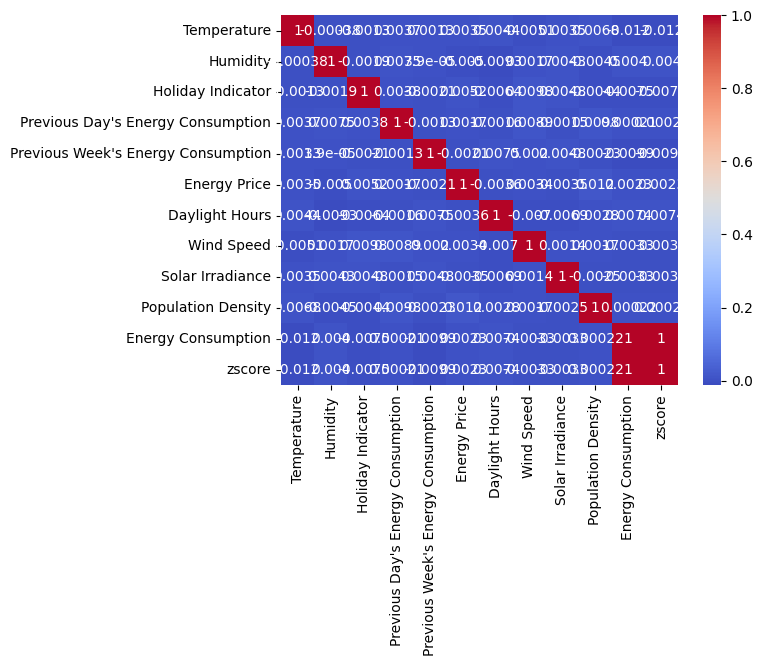

In [33]:
#heat map
sns.heatmap(corrilation,annot=True,cmap="coolwarm")
plt.show()

In [34]:
hmap=df1[["Temperature","Humidity","Energy Price","Population Density","Energy Consumption"]]
corr=hmap.corr()
corr

Temperature  Humidity  Energy Price  Population Density  \
Temperature            1.000000 -0.000377      0.003549            0.006848   
Humidity              -0.000377  1.000000     -0.004982           -0.004540   
Energy Price           0.003549 -0.004982      1.000000            0.011854   
Population Density     0.006848 -0.004540      0.011854            1.000000   
Energy Consumption    -0.011863  0.004040      0.002338            0.000223   

                    Energy Consumption  
Temperature                  -0.011863  
Humidity                      0.004040  
Energy Price                  0.002338  
Population Density            0.000223  
Energy Consumption            1.000000

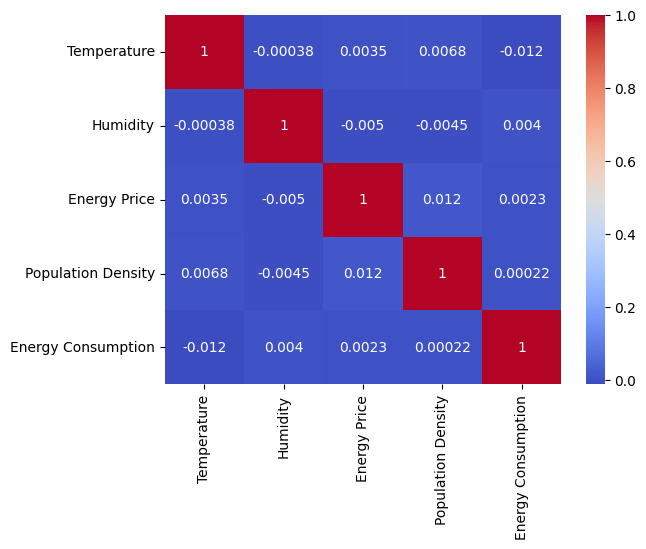

In [35]:
#heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

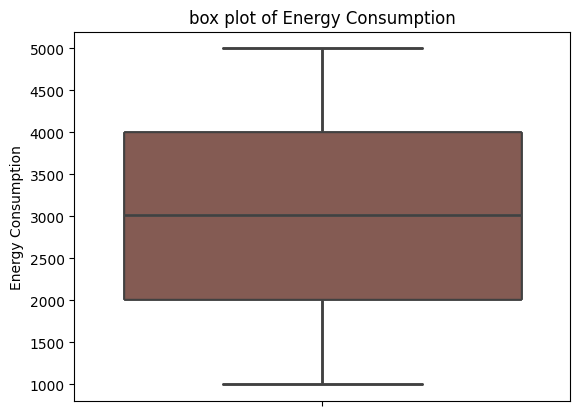

In [36]:
#box plot
for columns in df:sns.boxplot(data=df1["Energy Consumption"])
plt.title("box plot of Energy Consumption")
plt.show()

<Axes: >

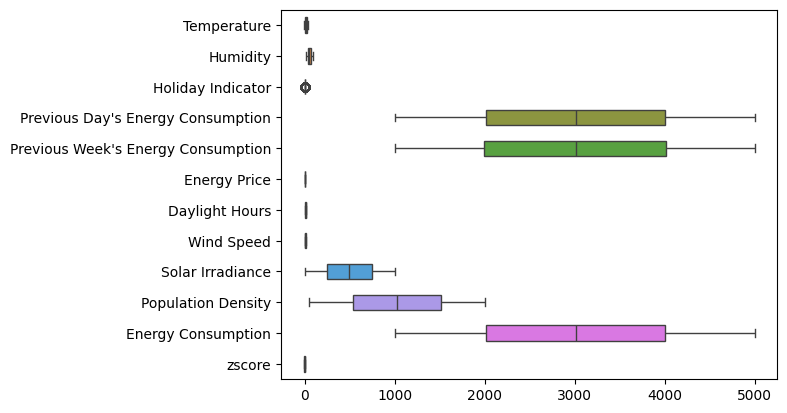

In [37]:
sns.boxplot(data=df1,width=0.5,orient="h")

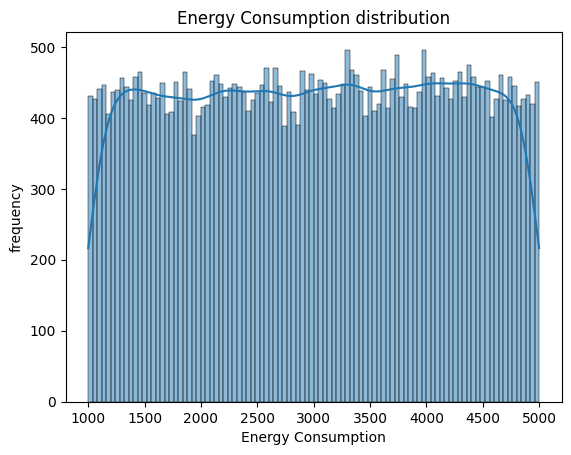

In [38]:
#hist plot
sns.histplot(dfnor["Energy Consumption"],bins=100,kde=True)
plt.xlabel("Energy Consumption")
plt.ylabel("frequency")
plt.title("Energy Consumption distribution")
plt.show()

In [39]:
from scipy import stats
dfnor['log_Energy Consumption']=np.log(dfnor["Energy Consumption"])

In [40]:
dfnor['log_Energy Consumption']

0        7.220752
1        8.313485
2        8.436912
3        8.182763
4        8.341460
           ...   
43820    6.991289
43821    8.361135
43822    7.977667
43823    7.987716
43824    7.295512
Name: log_Energy Consumption, Length: 43825, dtype: float64

In [41]:
dfnor['log_Energy Consumption'].skew()

-0.5646701380416458

In [42]:
dfnor['log_Energy Consumption'].kurtosis()

-0.7621716995942132

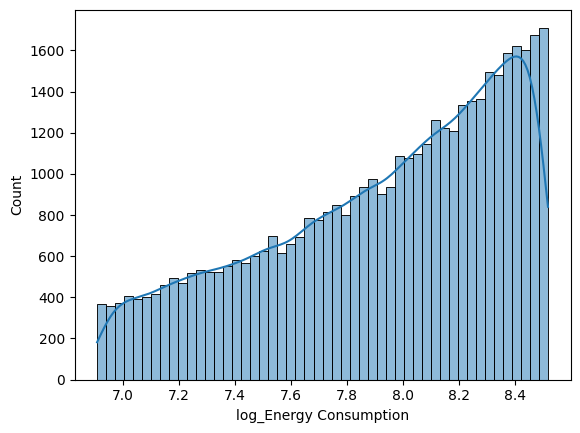

In [43]:
sns.histplot(dfnor["log_Energy Consumption"],bins=50,kde=True)
plt.show()

In [44]:
mean=dfnor["log_Energy Consumption"].mean()
median=dfnor["log_Energy Consumption"].median()
mean,median

(7.922660984737008, 8.01215026630974)

In [45]:
df1.columns

Index(['Temperature', 'Humidity', 'Holiday Indicator',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption', 'zscore'],
      dtype='object')

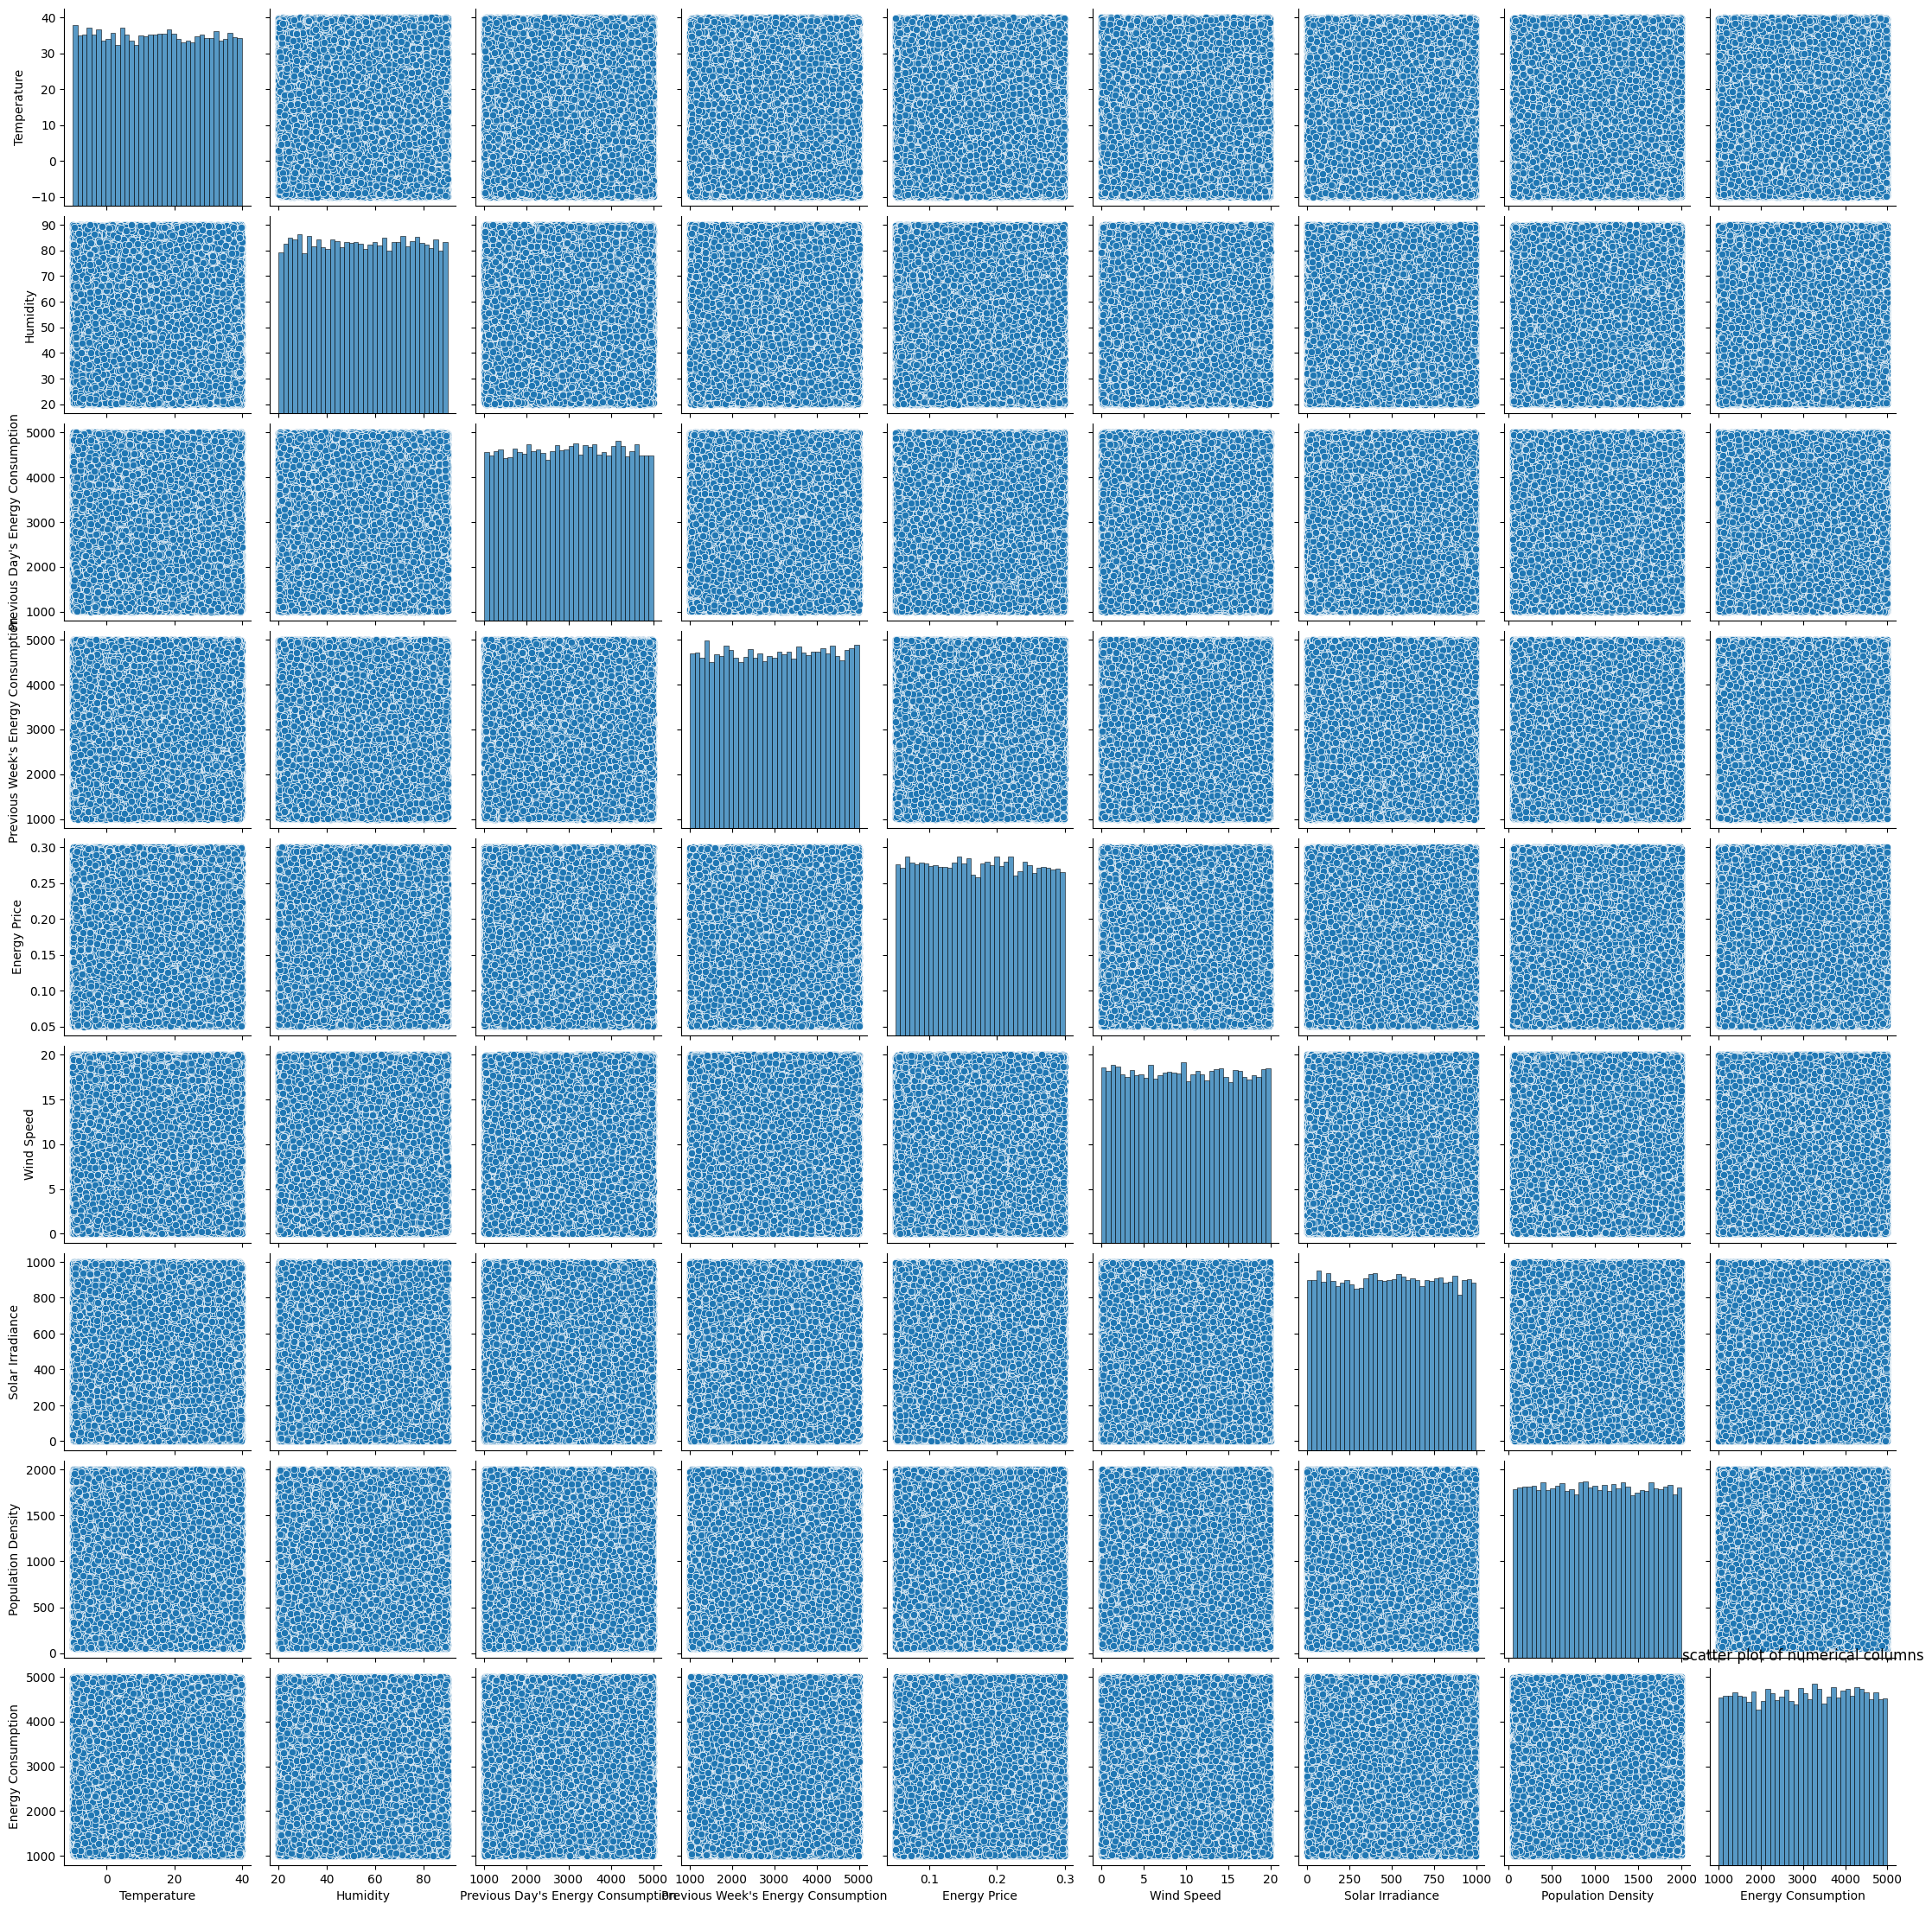

In [46]:
#pair plot
pair_plot=df1[['Temperature', 'Humidity',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption']]

#scatter ploting of numerical columns
sns.pairplot(pair_plot)
plt.title("scatter plot of numerical columns")
plt.show()

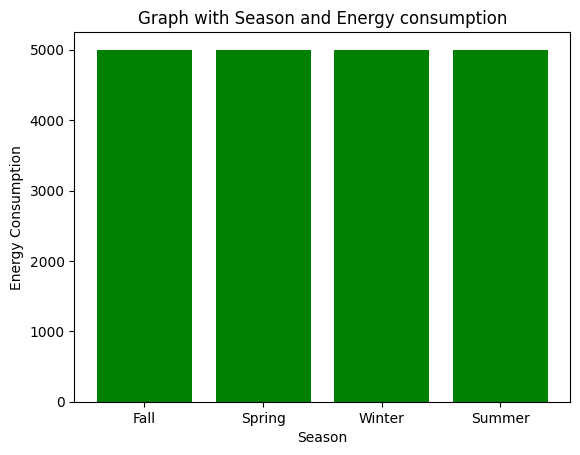

In [47]:
#chart with Season and Energy Consumption
x=df["Season"]
y=df["Energy Consumption"]
plt.bar(x,y,color="g")
plt.xlabel("Season")
plt.ylabel("Energy Consumption")
plt.title("Graph with Season and Energy consumption")
plt.show()

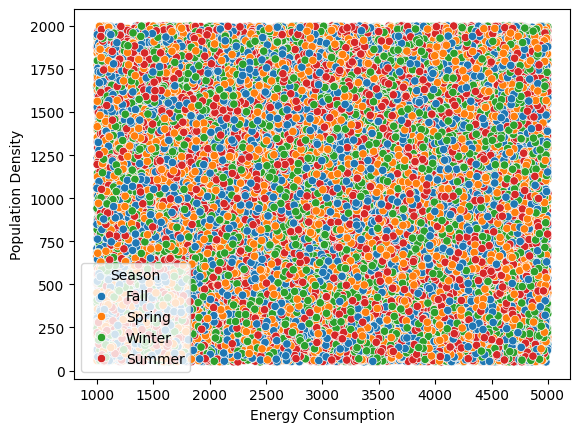

In [48]:
import seaborn as sns
sns.scatterplot(x="Energy Consumption",y="Population Density",hue="Season",data=df)
plt.show()

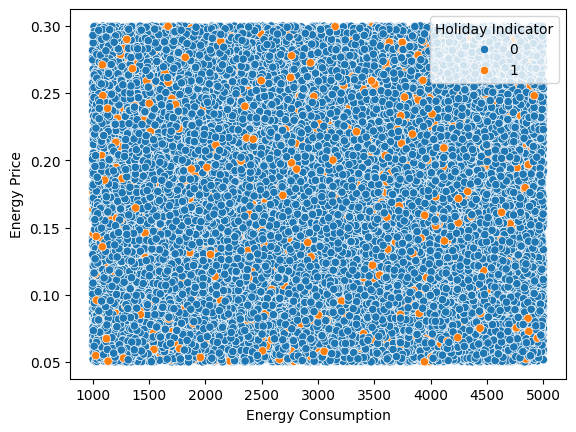

In [49]:
import seaborn as sns
sns.scatterplot(x="Energy Consumption",y="Energy Price",hue="Holiday Indicator",data=df)
plt.show()


FEATURE ENGINEERING

In [50]:
df.columns

Index(['Date/Time', 'Temperature', 'Humidity', 'Day of Week', 'Time of Day',
       'Season', 'Holiday Indicator', 'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption', 'zscore'],
      dtype='object')

In [51]:
df[["Previous Day's Energy Consumption","Previous Week's Energy Consumption","Energy Price","Population Density","Energy Consumption"]].head(10)

Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
0                        4437.698981                         1799.303909   
1                        2240.248004                         2109.917892   
2                        1443.646518                         2814.549791   
3                        2325.184898                         4680.163261   
4                        1552.041035                         4080.463060   
5                        3590.809601                         1215.095627   
6                        3665.938108                         4926.030664   
7                        4736.767919                         2587.785483   
8                        1299.561527                         1438.979010   
9                        2990.659766                         3636.713517   

   Energy Price  Population Density  Energy Consumption  
0      0.123206         1469.402213         1367.517344  
1      0.096013          169.805891         4078.500517  
2      0.161145         1988.009121         4614.282050  
3      0.272355          174.970181         3578.730578  
4      0.163503         1004.081112         4194.210499  
5      0.163618          390.843977         3362.496898  
6      0.062616         1862.289302         2343.483292  
7      0.205218         1259.642218         2806.375798  
8      0.132460          696.151095         2544.583836  
9      0.211614          783.213395         1716.301697

In [52]:
df[["Temperature","Humidity","Season","Wind Speed","Solar Irradiance"]].head(10)

Temperature   Humidity  Season  Wind Speed  Solar Irradiance
0    17.440675  73.264794    Fall    0.059692        169.032542
1    25.759468  29.280938  Spring   19.246831        705.612502
2    20.138169  55.772252  Winter   10.978002        268.142230
3    17.244159  87.520015  Summer    2.472984        262.186871
4    11.182740  26.383045    Fall    4.509169        486.224719
5    22.294706  69.428780    Fall    6.964644        454.978481
6    11.879361  82.593109  Spring   15.142984        369.942843
7    34.588650  70.686514  Spring   10.455741        838.103648
8    38.183138  71.695264  Spring    1.366344        233.164281
9     9.172076  51.134165  Summer    8.020126        943.162167

In [53]:
df[['Date/Time', 'Day of Week', 'Time of Day', 'Holiday Indicator','Daylight Hours']].head(10)
       


Date/Time Day of Week Time of Day  Holiday Indicator  \
0  2020-01-01 00:00:00   Wednesday       00:00                  1   
1  2020-01-01 01:00:00   Wednesday       01:00                  1   
2  2020-01-01 02:00:00   Wednesday       02:00                  0   
3  2020-01-01 03:00:00   Wednesday       03:00                  0   
4  2020-01-01 04:00:00   Wednesday       04:00                  0   
5  2020-01-01 05:00:00   Wednesday       05:00                  0   
6  2020-01-01 06:00:00   Wednesday       06:00                  0   
7  2020-01-01 07:00:00   Wednesday       07:00                  1   
8  2020-01-01 08:00:00   Wednesday       08:00                  0   
9  2020-01-01 09:00:00   Wednesday       09:00                  0   

   Daylight Hours  
0       12.228164  
1       14.950992  
2       11.384525  
3       10.109367  
4        9.012346  
5       15.933307  
6       11.805963  
7       10.209285  
8       11.517329  
9       13.900593

In [54]:
import pandas as pd
df['Date'] = pd.to_datetime(df['Date/Time']).dt.date
df['Time'] = pd.to_datetime(df['Date/Time']).dt.time
df.head(10)

Date/Time  Temperature   Humidity Day of Week Time of Day  \
0  2020-01-01 00:00:00    17.440675  73.264794   Wednesday       00:00   
1  2020-01-01 01:00:00    25.759468  29.280938   Wednesday       01:00   
2  2020-01-01 02:00:00    20.138169  55.772252   Wednesday       02:00   
3  2020-01-01 03:00:00    17.244159  87.520015   Wednesday       03:00   
4  2020-01-01 04:00:00    11.182740  26.383045   Wednesday       04:00   
5  2020-01-01 05:00:00    22.294706  69.428780   Wednesday       05:00   
6  2020-01-01 06:00:00    11.879361  82.593109   Wednesday       06:00   
7  2020-01-01 07:00:00    34.588650  70.686514   Wednesday       07:00   
8  2020-01-01 08:00:00    38.183138  71.695264   Wednesday       08:00   
9  2020-01-01 09:00:00     9.172076  51.134165   Wednesday       09:00   

   Season  Holiday Indicator  Previous Day's Energy Consumption  \
0    Fall                  1                        4437.698981   
1  Spring                  1                        2240.248004   
2  Winter                  0                        1443.646518   
3  Summer                  0                        2325.184898   
4    Fall                  0                        1552.041035   
5    Fall                  0                        3590.809601   
6  Spring                  0                        3665.938108   
7  Spring                  1                        4736.767919   
8  Spring                  0                        1299.561527   
9  Summer                  0                        2990.659766   

   Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                         1799.303909      0.123206       12.228164   
1                         2109.917892      0.096013       14.950992   
2                         2814.549791      0.161145       11.384525   
3                         4680.163261      0.272355       10.109367   
4                         4080.463060      0.163503        9.012346   
5                         1215.095627      0.163618       15.933307   
6                         4926.030664      0.062616       11.805963   
7                         2587.785483      0.205218       10.209285   
8                         1438.979010      0.132460       11.517329   
9                         3636.713517      0.211614       13.900593   

   Wind Speed  Solar Irradiance  Population Density  Energy Consumption  \
0    0.059692        169.032542         1469.402213         1367.517344   
1   19.246831        705.612502          169.805891         4078.500517   
2   10.978002        268.142230         1988.009121         4614.282050   
3    2.472984        262.186871          174.970181         3578.730578   
4    4.509169        486.224719         1004.081112         4194.210499   
5    6.964644        454.978481          390.843977         3362.496898   
6   15.142984        369.942843         1862.289302         2343.483292   
7   10.455741        838.103648         1259.642218         2806.375798   
8    1.366344        233.164281          696.151095         2544.583836   
9    8.020126        943.162167          783.213395         1716.301697   

     zscore        Date      Time  
0 -1.422487  2020-01-01  00:00:00  
1  0.927895  2020-01-01  01:00:00  
2  1.392410  2020-01-01  02:00:00  
3  0.494602  2020-01-01  03:00:00  
4  1.028214  2020-01-01  04:00:00  
5  0.307131  2020-01-01  05:00:00  
6 -0.576339  2020-01-01  06:00:00  
7 -0.175018  2020-01-01  07:00:00  
8 -0.401988  2020-01-01  08:00:00  
9 -1.120097  2020-01-01  09:00:00

In [55]:
df.drop(columns=["Date/Time"],inplace= True)
df

Temperature   Humidity Day of Week Time of Day  Season  \
0        17.440675  73.264794   Wednesday       00:00    Fall   
1        25.759468  29.280938   Wednesday       01:00  Spring   
2        20.138169  55.772252   Wednesday       02:00  Winter   
3        17.244159  87.520015   Wednesday       03:00  Summer   
4        11.182740  26.383045   Wednesday       04:00    Fall   
...            ...        ...         ...         ...     ...   
43820    16.224974  45.931201      Monday       20:00  Summer   
43821    -2.638805  64.145829      Monday       21:00    Fall   
43822    23.730335  70.776912      Monday       22:00  Spring   
43823    12.921507  40.567168      Monday       23:00  Spring   
43824    23.664244  52.840541     Tuesday       00:00    Fall   

       Holiday Indicator  Previous Day's Energy Consumption  \
0                      1                        4437.698981   
1                      1                        2240.248004   
2                      0                        1443.646518   
3                      0                        2325.184898   
4                      0                        1552.041035   
...                  ...                                ...   
43820                  1                        3299.135828   
43821                  0                        1435.657343   
43822                  0                        3441.205510   
43823                  0                        1200.156417   
43824                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  \
0        0.059692        169.032542         1469.402213         1367.517344   
1       19.246831        705.612502          169.805891         4078.500517   
2       10.978002        268.142230         1988.009121         4614.282050   
3        2.472984        262.186871          174.970181         3578.730578   
4        4.509169        486.224719         1004.081112         4194.210499   
...           ...               ...                 ...                 ...   
43820    3.685611        666.593466         1538.228889         1087.122191   
43821    6.561095        772.779958         1641.830840         4277.546615   
43822    7.276048        567.131701         1800.057131         2915.121073   
43823    7.211708         27.142705          926.475955         2944.563179   
43824    2.971656        373.238730          370.274341         1473.671093   

         zscore        Date      Time  
0     -1.422487  2020-01-01  00:00:00  
1      0.927895  2020-01-01  01:00:00  
2      1.392410  2020-01-01  02:00:00  
3      0.494602  2020-01-01  03:00:00  
4      1.028214  2020-01-01  04:00:00  
...         ...         ...       ...  
43820 -1.665586  2024-12-30  20:00:00  
43821  1.100465  2024-12-30  21:00:00  
43822 -0.080738  2024-12-30  22:00:00  
43823 -0.055212  2024-12-30  23:00:00  
43824 -1.330454  2024-12-31  00:00:00  

[43825 rows x 17 columns]

In [56]:
categorical_columns=df.select_dtypes(include="object")
categorical_columns

Day of Week Time of Day  Season        Date      Time
0       Wednesday       00:00    Fall  2020-01-01  00:00:00
1       Wednesday       01:00  Spring  2020-01-01  01:00:00
2       Wednesday       02:00  Winter  2020-01-01  02:00:00
3       Wednesday       03:00  Summer  2020-01-01  03:00:00
4       Wednesday       04:00    Fall  2020-01-01  04:00:00
...           ...         ...     ...         ...       ...
43820      Monday       20:00  Summer  2024-12-30  20:00:00
43821      Monday       21:00    Fall  2024-12-30  21:00:00
43822      Monday       22:00  Spring  2024-12-30  22:00:00
43823      Monday       23:00  Spring  2024-12-30  23:00:00
43824     Tuesday       00:00    Fall  2024-12-31  00:00:00

[43825 rows x 5 columns]

In [57]:
numerical_columns=df.select_dtypes(include="number")
numerical_columns

Temperature   Humidity  Holiday Indicator  \
0        17.440675  73.264794                  1   
1        25.759468  29.280938                  1   
2        20.138169  55.772252                  0   
3        17.244159  87.520015                  0   
4        11.182740  26.383045                  0   
...            ...        ...                ...   
43820    16.224974  45.931201                  1   
43821    -2.638805  64.145829                  0   
43822    23.730335  70.776912                  0   
43823    12.921507  40.567168                  0   
43824    23.664244  52.840541                  0   

       Previous Day's Energy Consumption  Previous Week's Energy Consumption  \
0                            4437.698981                         1799.303909   
1                            2240.248004                         2109.917892   
2                            1443.646518                         2814.549791   
3                            2325.184898                         4680.163261   
4                            1552.041035                         4080.463060   
...                                  ...                                 ...   
43820                        3299.135828                         3069.518353   
43821                        1435.657343                         1185.862843   
43822                        3441.205510                         3003.358652   
43823                        1200.156417                         4850.113450   
43824                        3268.350548                         3219.452035   

       Energy Price  Daylight Hours  Wind Speed  Solar Irradiance  \
0          0.123206       12.228164    0.059692        169.032542   
1          0.096013       14.950992   19.246831        705.612502   
2          0.161145       11.384525   10.978002        268.142230   
3          0.272355       10.109367    2.472984        262.186871   
4          0.163503        9.012346    4.509169        486.224719   
...             ...             ...         ...               ...   
43820      0.135656       12.340619    3.685611        666.593466   
43821      0.238843       11.169718    6.561095        772.779958   
43822      0.209155       15.948723    7.276048        567.131701   
43823      0.286449       14.597026    7.211708         27.142705   
43824      0.266919       11.846411    2.971656        373.238730   

       Population Density  Energy Consumption    zscore  
0             1469.402213         1367.517344 -1.422487  
1              169.805891         4078.500517  0.927895  
2             1988.009121         4614.282050  1.392410  
3              174.970181         3578.730578  0.494602  
4             1004.081112         4194.210499  1.028214  
...                   ...                 ...       ...  
43820         1538.228889         1087.122191 -1.665586  
43821         1641.830840         4277.546615  1.100465  
43822         1800.057131         2915.121073 -0.080738  
43823          926.475955         2944.563179 -0.055212  
43824          370.274341         1473.671093 -1.330454  

[43825 rows x 12 columns]

In [58]:
categorical_columns.columns

Index(['Day of Week', 'Time of Day', 'Season', 'Date', 'Time'], dtype='object')

In [59]:
numerical_columns.columns

Index(['Temperature', 'Humidity', 'Holiday Indicator',
       'Previous Day's Energy Consumption',
       'Previous Week's Energy Consumption', 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density',
       'Energy Consumption', 'zscore'],
      dtype='object')

## FEATURE SELECTION

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif
X = numerical_columns.drop(columns=['Energy Consumption'])  # Drop the target variable column
y = numerical_columns['Energy Consumption']  # Assign the target variable column
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features based on ANOVA F-value
X_new = selector.fit_transform(X, y)
# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features_names = X.columns[selected_features_indices]
print(selected_features_names)

Index(['Daylight Hours', 'Wind Speed', 'Solar Irradiance',
       'Population Density', 'zscore'],
      dtype='object')


C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


## ENCODING CATEGOROCAL VARIABLES

In [61]:
import pandas as pd

# Apply one-hot encoding to all categorical columns
encoded_df = pd.get_dummies(categorical_columns)

print(encoded_df)


       Day of Week_Friday  Day of Week_Monday  Day of Week_Saturday  \
0                   False               False                 False   
1                   False               False                 False   
2                   False               False                 False   
3                   False               False                 False   
4                   False               False                 False   
...                   ...                 ...                   ...   
43820               False                True                 False   
43821               False                True                 False   
43822               False                True                 False   
43823               False                True                 False   
43824               False               False                 False   

       Day of Week_Sunday  Day of Week_Thursday  Day of Week_Tuesday  \
0                   False                 False                False   
1  

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        df[col] = label_encoder.fit_transform(df[col])

print(df)



       Temperature   Humidity  Day of Week  Time of Day  Season  \
0        17.440675  73.264794            6            0       0   
1        25.759468  29.280938            6            1       1   
2        20.138169  55.772252            6            2       3   
3        17.244159  87.520015            6            3       2   
4        11.182740  26.383045            6            4       0   
...            ...        ...          ...          ...     ...   
43820    16.224974  45.931201            1           20       2   
43821    -2.638805  64.145829            1           21       0   
43822    23.730335  70.776912            1           22       1   
43823    12.921507  40.567168            1           23       1   
43824    23.664244  52.840541            5            0       0   

       Holiday Indicator  Previous Day's Energy Consumption  \
0                      1                        4437.698981   
1                      1                        2240.248004   
2     

In [63]:
df

Temperature   Humidity  Day of Week  Time of Day  Season  \
0        17.440675  73.264794            6            0       0   
1        25.759468  29.280938            6            1       1   
2        20.138169  55.772252            6            2       3   
3        17.244159  87.520015            6            3       2   
4        11.182740  26.383045            6            4       0   
...            ...        ...          ...          ...     ...   
43820    16.224974  45.931201            1           20       2   
43821    -2.638805  64.145829            1           21       0   
43822    23.730335  70.776912            1           22       1   
43823    12.921507  40.567168            1           23       1   
43824    23.664244  52.840541            5            0       0   

       Holiday Indicator  Previous Day's Energy Consumption  \
0                      1                        4437.698981   
1                      1                        2240.248004   
2                      0                        1443.646518   
3                      0                        2325.184898   
4                      0                        1552.041035   
...                  ...                                ...   
43820                  1                        3299.135828   
43821                  0                        1435.657343   
43822                  0                        3441.205510   
43823                  0                        1200.156417   
43824                  0                        3268.350548   

       Previous Week's Energy Consumption  Energy Price  Daylight Hours  \
0                             1799.303909      0.123206       12.228164   
1                             2109.917892      0.096013       14.950992   
2                             2814.549791      0.161145       11.384525   
3                             4680.163261      0.272355       10.109367   
4                             4080.463060      0.163503        9.012346   
...                                   ...           ...             ...   
43820                         3069.518353      0.135656       12.340619   
43821                         1185.862843      0.238843       11.169718   
43822                         3003.358652      0.209155       15.948723   
43823                         4850.113450      0.286449       14.597026   
43824                         3219.452035      0.266919       11.846411   

       Wind Speed  Solar Irradiance  Population Density  Energy Consumption  \
0        0.059692        169.032542         1469.402213         1367.517344   
1       19.246831        705.612502          169.805891         4078.500517   
2       10.978002        268.142230         1988.009121         4614.282050   
3        2.472984        262.186871          174.970181         3578.730578   
4        4.509169        486.224719         1004.081112         4194.210499   
...           ...               ...                 ...                 ...   
43820    3.685611        666.593466         1538.228889         1087.122191   
43821    6.561095        772.779958         1641.830840         4277.546615   
43822    7.276048        567.131701         1800.057131         2915.121073   
43823    7.211708         27.142705          926.475955         2944.563179   
43824    2.971656        373.238730          370.274341         1473.671093   

         zscore  Date  Time  
0     -1.422487     0     0  
1      0.927895     0     1  
2      1.392410     0     2  
3      0.494602     0     3  
4      1.028214     0     4  
...         ...   ...   ...  
43820 -1.665586  1825    20  
43821  1.100465  1825    21  
43822 -0.080738  1825    22  
43823 -0.055212  1825    23  
43824 -1.330454  1826     0  

[43825 rows x 17 columns]

In [64]:
x=numerical_columns.drop(columns=["Energy Consumption"])
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled


array([[0.54879291, 0.76094902, 1.        , ..., 0.16901568, 0.72790092,
        0.09187376],
       [0.7151845 , 0.13258617, 1.        , ..., 0.70565357, 0.06143358,
        0.76963955],
       [0.60274788, 0.51104679, 0.        , ..., 0.26813607, 0.99385624,
        0.90358889],
       ...,
       [0.674598  , 0.72540661, 0.        , ..., 0.56715782, 0.8974695 ,
        0.47878611],
       [0.45840102, 0.29382369, 0.        , ..., 0.02711052, 0.44947399,
        0.48614685],
       [0.67327605, 0.46916374, 0.        , ..., 0.37324392, 0.1642391 ,
        0.11841298]])

In [65]:
y=df[["Energy Consumption"]]
y_scaled=scaler.fit_transform(y)
y_scaled

array([[0.09187376],
       [0.76963955],
       [0.90358889],
       ...,
       [0.47878611],
       [0.48614685],
       [0.11841298]])

## DATA MODELING USING MACHINE LEARNING MODELS

## GB REGRESSOR

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = numerical_columns.drop(columns=['Energy Consumption'])  # Drop the target variable column
y = df['Energy Consumption']  # Assign the target variable column
# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features based on ANOVA F-value
X_selected = selector.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Fit the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = gb_regressor.predict(X_test)

# Evaluate the model

# Calculate Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


Mean Squared Error (MSE): 62.26922388034315
Root Mean Squared Error (RMSE): 7.891085088905274
Mean Absolute Error (MAE): 5.954418732502945
R2 Score: 0.9999538271107823


## LINEAR REGRESSION

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model on the testing set
gb_predictions = gb_regressor.predict(x_test)

# Combine features (stacking the original features and predictions)
x_linear_regression = np.column_stack((x_test, gb_predictions))

# Build and train the multiple linear regression model on the training set
reg = LinearRegression()
reg.fit(x_train, y_train)  # Using y_train instead of y_test

# Make predictions with the Linear Regression model on the testing set
pred = reg.predict(x_test)  # Using x_test instead of x_linear_regression


C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [68]:
x_train

array([[0.09635403, 0.32295868, 0.        , ..., 0.51326018, 0.97968602,
        0.90282174],
       [0.75530619, 0.25405274, 0.        , ..., 0.34559714, 0.19047112,
        0.13865509],
       [0.50659412, 0.07134911, 0.        , ..., 0.5226772 , 0.82722795,
        0.2014868 ],
       ...,
       [0.31791382, 0.93148104, 0.        , ..., 0.99027147, 0.75687977,
        0.38629138],
       [0.93713315, 0.73665009, 0.        , ..., 0.08627868, 0.1875591 ,
        0.37170963],
       [0.04526339, 0.13062529, 0.        , ..., 0.81343405, 0.45415127,
        0.90803841]])

In [69]:
x_test

array([[0.45272712, 0.71393323, 0.        , ..., 0.55413465, 0.70660605,
        0.90466066],
       [0.59091012, 0.48216286, 0.        , ..., 0.69016515, 0.45062589,
        0.13765431],
       [0.56926148, 0.2006981 , 0.        , ..., 0.04665438, 0.95709976,
        0.89453206],
       ...,
       [0.86664467, 0.7256773 , 0.        , ..., 0.30476166, 0.74145763,
        0.93237095],
       [0.97087425, 0.80682504, 0.        , ..., 0.83150664, 0.62874752,
        0.62923573],
       [0.92583213, 0.0092488 , 0.        , ..., 0.05752721, 0.09680953,
        0.40178522]])

In [70]:
y_train

array([[0.90282174],
       [0.13865509],
       [0.2014868 ],
       ...,
       [0.38629138],
       [0.37170963],
       [0.90803841]])

In [71]:
y_test

array([[0.90466066],
       [0.13765431],
       [0.89453206],
       ...,
       [0.93237095],
       [0.62923573],
       [0.40178522]])

In [72]:
pred

array([[0.90466066],
       [0.13765431],
       [0.89453206],
       ...,
       [0.93237095],
       [0.62923573],
       [0.40178522]])

In [73]:
print("Coefficients:", reg.coef_)


Coefficients: [[ 7.20641336e-16  0.00000000e+00 -1.43635104e-15 -4.16333634e-17
   8.67361738e-17 -5.55111512e-17 -5.55111512e-17 -6.93889390e-17
   0.00000000e+00  4.44089210e-16  1.00000000e+00]]


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score






mse=mean_squared_error(y_test,pred)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 4.372893211632755e-30
Root Mean Squared Error (RMSE): 2.091146386944911e-15
Mean Absolute Error (MAE): 1.9867835701852767e-15
R-squared (coefficient of determination): 1.0


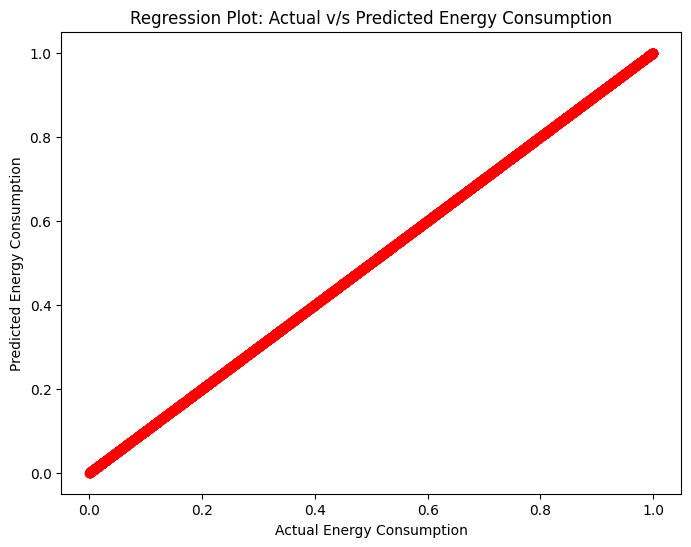

In [75]:
# Create a regression plot (scatter plot with a regression line)
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=pred,color="red")
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Regression Plot: Actual v/s Predicted Energy Consumption')
plt.show()

## Decision Tree

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[['Temperature','Humidity', 'Holiday Indicator',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density']]


# Target variable
y = df['Energy Consumption']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Create the Decision Tree Regressor object
regressor = DecisionTreeRegressor(max_depth=8, random_state=100)

# Fit the model
regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_d = regressor.predict(x_test)

In [77]:
x_train

array([[0.09635403, 0.32295868, 0.        , ..., 0.51326018, 0.97968602,
        0.90282174],
       [0.75530619, 0.25405274, 0.        , ..., 0.34559714, 0.19047112,
        0.13865509],
       [0.50659412, 0.07134911, 0.        , ..., 0.5226772 , 0.82722795,
        0.2014868 ],
       ...,
       [0.31791382, 0.93148104, 0.        , ..., 0.99027147, 0.75687977,
        0.38629138],
       [0.93713315, 0.73665009, 0.        , ..., 0.08627868, 0.1875591 ,
        0.37170963],
       [0.04526339, 0.13062529, 0.        , ..., 0.81343405, 0.45415127,
        0.90803841]])

In [78]:
x_test

array([[0.45272712, 0.71393323, 0.        , ..., 0.55413465, 0.70660605,
        0.90466066],
       [0.59091012, 0.48216286, 0.        , ..., 0.69016515, 0.45062589,
        0.13765431],
       [0.56926148, 0.2006981 , 0.        , ..., 0.04665438, 0.95709976,
        0.89453206],
       ...,
       [0.86664467, 0.7256773 , 0.        , ..., 0.30476166, 0.74145763,
        0.93237095],
       [0.97087425, 0.80682504, 0.        , ..., 0.83150664, 0.62874752,
        0.62923573],
       [0.92583213, 0.0092488 , 0.        , ..., 0.05752721, 0.09680953,
        0.40178522]])

In [79]:
y_train

array([[0.90282174],
       [0.13865509],
       [0.2014868 ],
       ...,
       [0.38629138],
       [0.37170963],
       [0.90803841]])

In [80]:
y_test

array([[0.90466066],
       [0.13765431],
       [0.89453206],
       ...,
       [0.93237095],
       [0.62923573],
       [0.40178522]])

In [81]:
pred_d

array([0.90382937, 0.13804744, 0.89634803, ..., 0.9309285 , 0.62742171,
       0.40017262])

In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score




mse=mean_squared_error(y_test,pred_d)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_d)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_d)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 1.3042144523228011e-06
Root Mean Squared Error (RMSE): 0.0011420220892446875
Mean Absolute Error (MAE): 0.0009872202506022107
R-squared (coefficient of determination): 0.99998452762584


## RandomForestRegressor

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Features
x = numerical_columns.drop(columns=["Energy Consumption"])


# Target variable
y = df['Energy Consumption']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
# Create the Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)

# Fit the model
rf_regressor.fit(x_train, y_train)

# Predict the values of the test data
pred_r = rf_regressor.predict(x_test)

C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [84]:
x_train

array([[0.09635403, 0.32295868, 0.        , ..., 0.51326018, 0.97968602,
        0.90282174],
       [0.75530619, 0.25405274, 0.        , ..., 0.34559714, 0.19047112,
        0.13865509],
       [0.50659412, 0.07134911, 0.        , ..., 0.5226772 , 0.82722795,
        0.2014868 ],
       ...,
       [0.31791382, 0.93148104, 0.        , ..., 0.99027147, 0.75687977,
        0.38629138],
       [0.93713315, 0.73665009, 0.        , ..., 0.08627868, 0.1875591 ,
        0.37170963],
       [0.04526339, 0.13062529, 0.        , ..., 0.81343405, 0.45415127,
        0.90803841]])

In [85]:
x_test

array([[0.45272712, 0.71393323, 0.        , ..., 0.55413465, 0.70660605,
        0.90466066],
       [0.59091012, 0.48216286, 0.        , ..., 0.69016515, 0.45062589,
        0.13765431],
       [0.56926148, 0.2006981 , 0.        , ..., 0.04665438, 0.95709976,
        0.89453206],
       ...,
       [0.86664467, 0.7256773 , 0.        , ..., 0.30476166, 0.74145763,
        0.93237095],
       [0.97087425, 0.80682504, 0.        , ..., 0.83150664, 0.62874752,
        0.62923573],
       [0.92583213, 0.0092488 , 0.        , ..., 0.05752721, 0.09680953,
        0.40178522]])

In [86]:
y_train

array([[0.90282174],
       [0.13865509],
       [0.2014868 ],
       ...,
       [0.38629138],
       [0.37170963],
       [0.90803841]])

In [87]:
y_test

array([[0.90466066],
       [0.13765431],
       [0.89453206],
       ...,
       [0.93237095],
       [0.62923573],
       [0.40178522]])

In [88]:
pred_r

array([0.90466888, 0.13763927, 0.8945515 , ..., 0.93238075, 0.62927283,
       0.4017937 ])

In [89]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse=mean_squared_error(y_test,pred_r)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_r)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 7.731992411697128e-10
Root Mean Squared Error (RMSE): 2.7806460421450854e-05
Mean Absolute Error (MAE): 2.0996394688536682e-05
R-squared (coefficient of determination): 1.0


## SVM

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features
x = df[['Temperature','Humidity', 'Holiday Indicator',
       "Previous Day's Energy Consumption",
       "Previous Week's Energy Consumption", 'Energy Price', 'Daylight Hours',
       'Wind Speed', 'Solar Irradiance', 'Population Density']]


# Target variable
y = df['Energy Consumption']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions with the Gradient Boosting model
gb_predictions = gb_regressor.predict(x_test)

# Now, use the predictions as input features for the SVM
x_combined = np.column_stack((x_test, gb_predictions))

# Create the Support Vector Machine Regressor (SVM)
svm_regressor = SVR(kernel='linear', C=1.0)

# Fit the SVM model
svm_regressor.fit(x_combined, y_test)

# Predict the values of the test data using the SVM
pred_s = svm_regressor.predict(x_combined)

C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\final solution\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
x_train

array([[0.09635403, 0.32295868, 0.        , ..., 0.51326018, 0.97968602,
        0.90282174],
       [0.75530619, 0.25405274, 0.        , ..., 0.34559714, 0.19047112,
        0.13865509],
       [0.50659412, 0.07134911, 0.        , ..., 0.5226772 , 0.82722795,
        0.2014868 ],
       ...,
       [0.31791382, 0.93148104, 0.        , ..., 0.99027147, 0.75687977,
        0.38629138],
       [0.93713315, 0.73665009, 0.        , ..., 0.08627868, 0.1875591 ,
        0.37170963],
       [0.04526339, 0.13062529, 0.        , ..., 0.81343405, 0.45415127,
        0.90803841]])

In [92]:
x_test

array([[0.45272712, 0.71393323, 0.        , ..., 0.55413465, 0.70660605,
        0.90466066],
       [0.59091012, 0.48216286, 0.        , ..., 0.69016515, 0.45062589,
        0.13765431],
       [0.56926148, 0.2006981 , 0.        , ..., 0.04665438, 0.95709976,
        0.89453206],
       ...,
       [0.86664467, 0.7256773 , 0.        , ..., 0.30476166, 0.74145763,
        0.93237095],
       [0.97087425, 0.80682504, 0.        , ..., 0.83150664, 0.62874752,
        0.62923573],
       [0.92583213, 0.0092488 , 0.        , ..., 0.05752721, 0.09680953,
        0.40178522]])

In [93]:
y_train

array([[0.90282174],
       [0.13865509],
       [0.2014868 ],
       ...,
       [0.38629138],
       [0.37170963],
       [0.90803841]])

In [94]:
y_test

array([[0.90466066],
       [0.13765431],
       [0.89453206],
       ...,
       [0.93237095],
       [0.62923573],
       [0.40178522]])

In [95]:
pred_s

array([0.82465858, 0.20808187, 0.81594341, ..., 0.846038  , 0.60400923,
       0.42105466])

In [96]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



mse=mean_squared_error(y_test,pred_s)
print("Mean Squared Error (MSE):",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error (RMSE):",rmse )



mae=mean_absolute_error(y_test,pred_s)
print("Mean Absolute Error (MAE):",mae)

r_squared=r2_score(y_test,pred_s)
print("R-squared (coefficient of determination):",r_squared)

Mean Squared Error (MSE): 0.0033656043332293876
Root Mean Squared Error (RMSE): 0.058013828810287875
Mean Absolute Error (MAE): 0.05043710659026792
R-squared (coefficient of determination): 0.9600726019976389


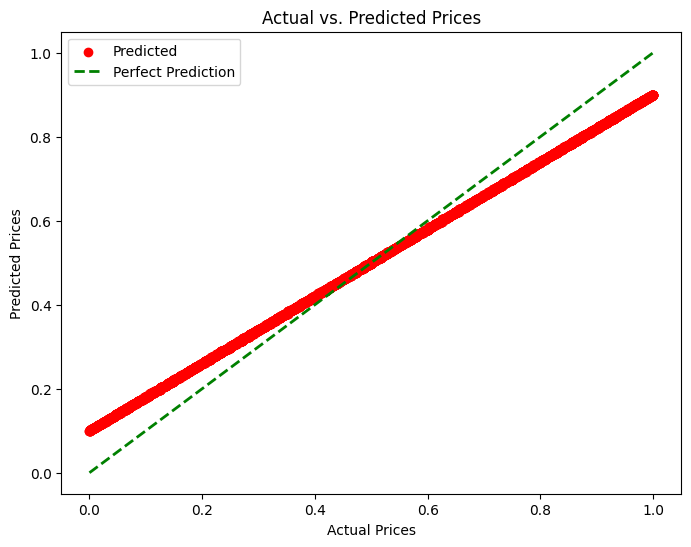

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_s, color='red', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

## HYPER PARAMETER OPTIMIZATION USING USING GRIDSEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = df
X = numerical_columns.drop(columns=["Energy Consumption"])
y=df["Energy Consumption"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'Linear Regression': LinearRegression()
}

# Define hyperparameters grid
param_grid = {
    'Gradient Boosting Regressor': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]},
    'Decision Tree Regressor': {'max_depth': [None, 5, 10, 15]},
    'Random Forest Regressor': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10, 15]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
    'Linear Regression': {}
}

# Perform grid search
for name, model in models.items():
    print("Tuning hyperparameters for:", name)
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print("Best parameters found:", grid_search.best_params_)
    print("Best score on validation data:", -grid_search.best_score_)
    y_pred = grid_search.best_estimator_.predict(X_test)
    print("Mean squared error on test data:", mean_squareenergy consumption.by using time series model, we can getd_error(y_test, y_pred))
    print()


## CONCLUSION

From the given data set, we have generated 5 machine learning models which are gradient booster regressor ,linear regressor,decision tree,random forest regressor,svr etc.
among them the one with least MSE value can be considered as a good model. here SVR is a good model.
with the help of this model we can extend our studies to more features that could effect energy consumption..
By using time series model like arima,sarima,exponential smoothing, we can get more accurate result.
re the underlying patterns,possibly due to overfitting(model is too complexx and captures noise as well).hyper parameter optimization can reduce noise in a data.underfitting leads to high bias while overfitting leads to high variance.here gb regressor model has high MSE value where as other models have very low MSE value compared to this.with the reference of this model we can develop better models by including more features ,with good data preprocessing,feature selection,model selection etc.

feature selection using kbest gave 5 best features which are 'Daylight Hours', 'Wind Speed', 'Solar Irradiance', 'Population Density', 'zscore that has influence on energy consumption according to this data set. by controlling these features we can attain optimization in energy consumption.
,

## TIME SERIES MODELING - ARIMA, SARIMA,EXPONENTIAL SMOOTHING


ARIMA :

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

As its name suggests, it supports both an autoregressive and moving average elements. The integrated element refers to differencing allowing the method to support time series data with a trend.

A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.





ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differ

SARIMA :

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA.

The seasonal part of the model consists of terms that are very similar to the non-seasonal components of the model, but they involve backshifts of the seasonal 

Exponential Smoothing :

 Exponential smoothing is similar to simple moving averages in the sense that it estimates future values based on past observations, but there's a critical difference: Simple moving averages consider past observations equally, whereas exponential smoothing assigns exponentially decreasing weights over time.Exponential smoothing is a method for forecasting univariate time series data. It is based on the principle that a prediction is a weighted linear sum of past observations or lags. The Exponential Smoothing time series method works by assigning exponentially decreasing weights for past observations.20period.encing.